In [28]:
import cv2
import numpy as np

In [29]:
img = cv2.imread('noise.png', 0)
from google.colab.patches import cv2_imshow

original


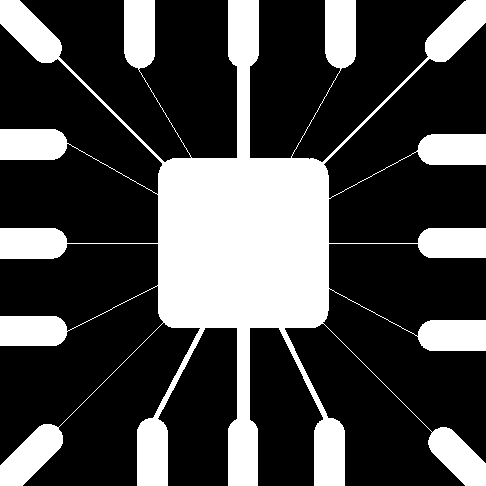

erosion


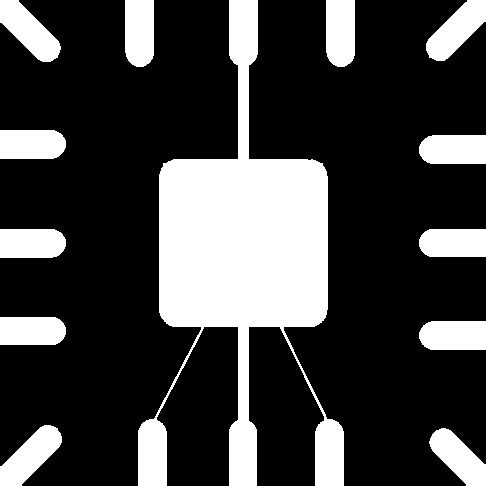

In [30]:
def erosion(img, kernel):
    altura, largura = img.shape
    k_altura, k_largura = kernel.shape
    output_img = np.zeros_like(img)

    pad_h = k_altura // 2
    pad_w = k_largura // 2
    img_padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=255)

    for i in range(pad_h, altura + pad_h):
        for j in range(pad_w, largura + pad_w):
            region = img_padded[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            if np.all(region[kernel == 1] == 255):  # condition
                output_img[i-pad_h, j-pad_w] = 255
            else:
                output_img[i-pad_h, j-pad_w] = 0

    return output_img

erosion_img = cv2.imread('Fig0905(a)(wirebond-mask).tif', 0)
kernel = np.ones((3, 3), np.uint8)

# apply
erosion_result = erosion(erosion_img, kernel)

# show
print('original')
cv2_imshow(erosion_img)
print('erosion')
cv2_imshow(erosion_result)

original


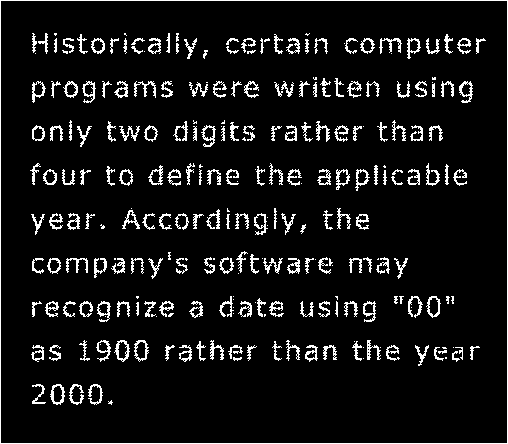

dilation


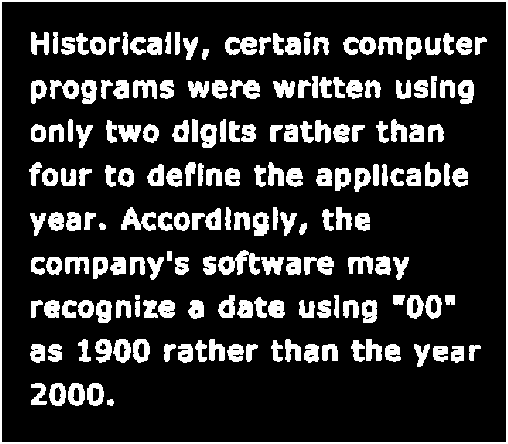

In [31]:
def dilation(img, kernel):
    altura, largura = img.shape
    k_altura, k_largura = kernel.shape
    output_img = np.zeros_like(img)

    pad_h = k_altura // 2
    pad_w = k_largura // 2
    img_padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    for i in range(pad_h, altura + pad_h):
        for j in range(pad_w, largura + pad_w):
            region = img_padded[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            if np.any(region[kernel == 1] == 255):  # condition
                output_img[i-pad_h, j-pad_w] = 255
            else:
                output_img[i-pad_h, j-pad_w] = 0

    return output_img

kernel = np.ones((3, 3), np.uint8)

# apply
dilation_img = cv2.imread('Fig0907(a)(text_gaps_1_and_2_pixels).tif', 0)
dilation_result = dilation(dilation_img, kernel)

# show imgs
print('original')
cv2_imshow(dilation_img)
print('dilation')
cv2_imshow(dilation_result)

sobel erosion original


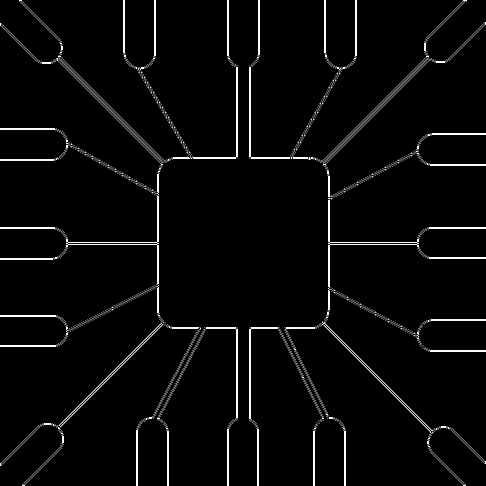

sobel dilation original


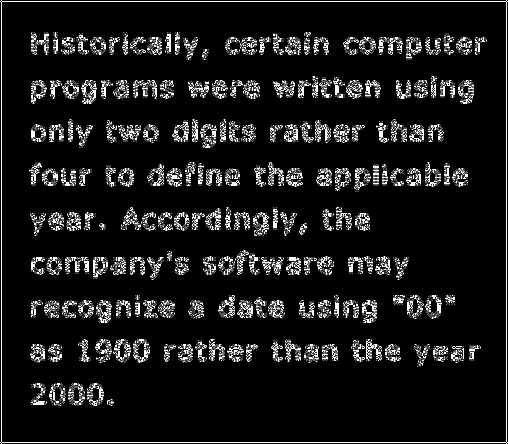

sobel after erosion


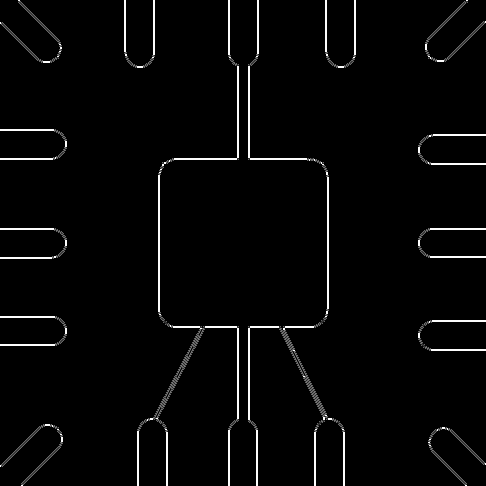

sobel after dilation


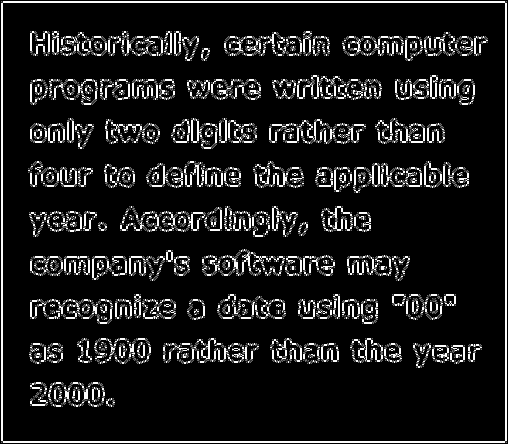

In [32]:
def sobel(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # X
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Y
    sobel_combined = cv2.magnitude(sobelx, sobely)

    return np.uint8(sobel_combined)

sobel_erosion_original = sobel(erosion_img)
sobel_dilation_original = sobel(dilation_img)
sobel_after_erosion = sobel(erosion_result)
sobel_after_dilation = sobel(dilation_result)

print('sobel erosion original')
cv2_imshow(sobel_erosion_original)
print('sobel dilation original')
cv2_imshow(sobel_dilation_original)
print('sobel after erosion')
cv2_imshow(sobel_after_erosion)
print('sobel after dilation')
cv2_imshow(sobel_after_dilation)

**After the application of morphological operations was visualized: **

Erosion: Reduction of white areas (thin edges, small details disappear). Dilation: Expansion of white areas (borders thicken, small details can be fused).